In [ ]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
accidents = pd.read_csv("/content/severe_injury.zip", encoding="latin-1")

In [ ]:
accidents.drop(["ID","UPA","Address1","Address2","Primary NAICS","Inspection",
         "Nature","Part of Body","Event","Source","Secondary Source"],axis=1,inplace=True)

In [ ]:
accidents.head()

,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,Final Narrative,NatureTitle,Part of Body Title,EventTitle,SourceTitle,Secondary Source Title
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,1.0,0.0,Three correctional facility guards were escort...,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,Inmate or detainee in custody
1,1/1/2015,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,1.0,0.0,Employee in the Machine Shop received second d...,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",NaN
2,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,1.0,0.0,A truck driver fell approximately 4 feet while...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",Ladders-fixed
3,1/1/2015,PEPSI BOTTLING GROUP INC.,MACON,GEORGIA,31206.0,32.77,-83.65,1.0,0.0,An employee's leg was pinned between a truck a...,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,"Truck-motorized freight hauling and utility, u..."
4,1/1/2015,North American Pipe Corporation,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,1.0,0.0,An employee working on the Line 6 Auto-Beller ...,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",NaN


1.Ποιές είναι οι 20 Πόλεις με τα περισσότερα περιστατικά τραυματισμών;

In [ ]:
accidents['City'].value_counts()[:20]

HOUSTON         1379
ORLANDO          703
CHICAGO          677
DALLAS           657
SAN ANTONIO      538
MIAMI            518
COLUMBUS         502
ATLANTA          485
JACKSONVILLE     476
DENVER           468
FORT WORTH       457
KANSAS CITY      396
PHILADELPHIA     381
TAMPA            377
AUSTIN           343
NEW YORK         343
CINCINNATI       337
CLEVELAND        307
SPRINGFIELD      298
WASHINGTON       290
Name: City, dtype: int64

<Axes: >

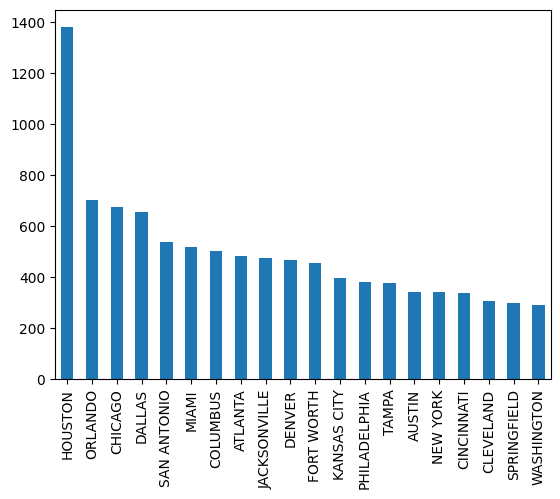

In [ ]:
accidents['City'].value_counts()[:20].plot(kind='bar')

2.Ποιά είναι τα 20 μέλη του σώματος που τραυματίζονται πιο συχνά;

In [ ]:
accidents['Part of Body Title'].loc[accidents['Part of Body Title'].str.contains('Finger')] = 'Finger injuries'

<Axes: ylabel='Part of Body Title'>

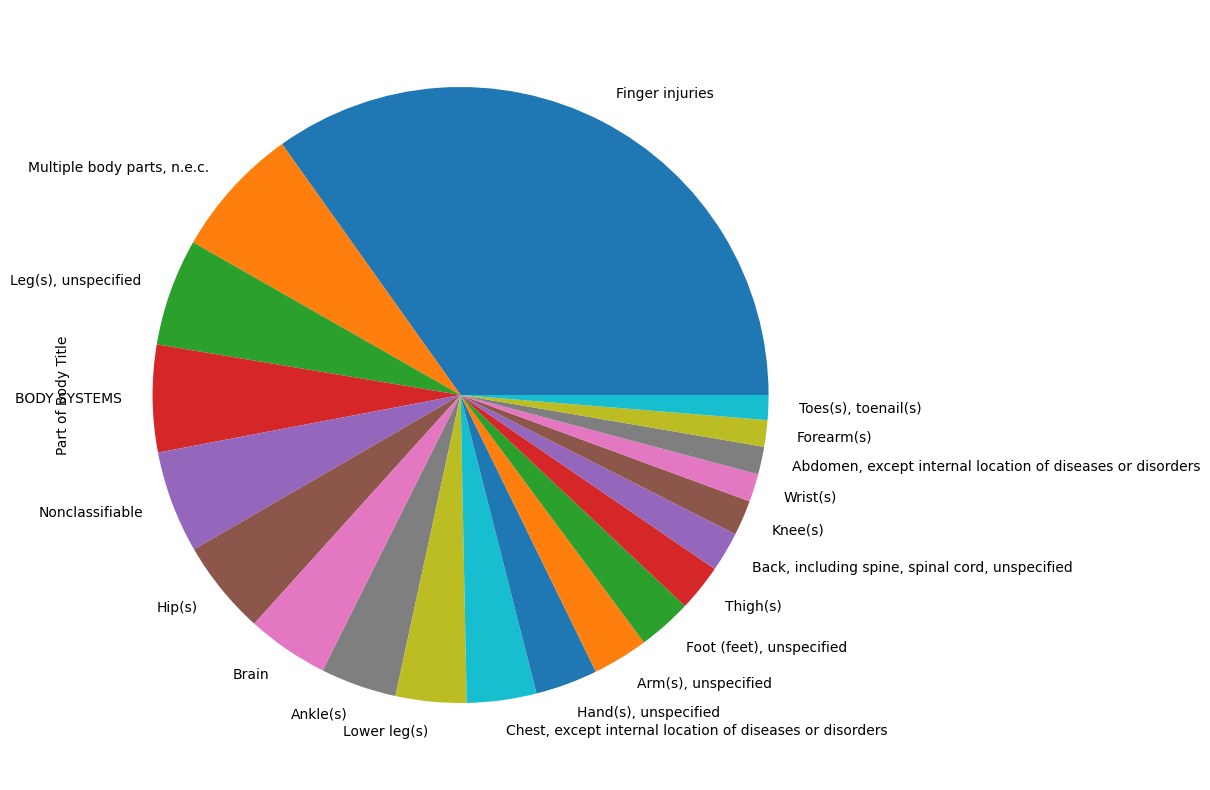

In [ ]:
accidents['Part of Body Title'].value_counts()[:20].plot(kind='pie', figsize=(15.,10.) )

3. Ποιές είναι οι Top 5 πολιτείες με τα περισσότερα περιστατικά ακρωτηριασμού;

<Axes: xlabel='State'>

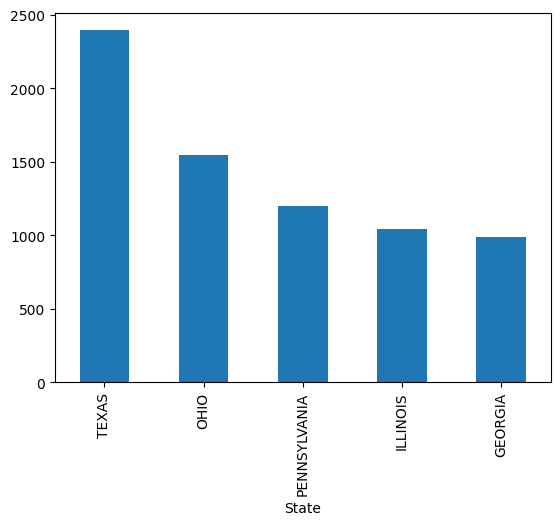

In [ ]:
accidents.groupby('State')['Amputation'].sum().sort_values(ascending= False).head(5).plot(kind='bar')

4.Συσχέτιση μεταξύ Latitude & Longitude.

<Axes: xlabel='Latitude', ylabel='Longitude'>

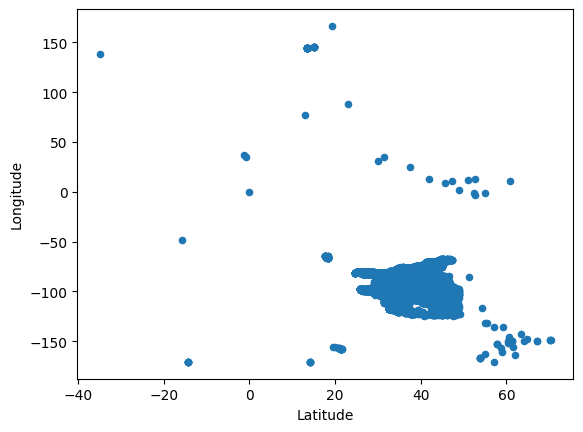

In [ ]:
accidents.plot(kind='scatter', x='Latitude', y='Longitude')

<Axes: >

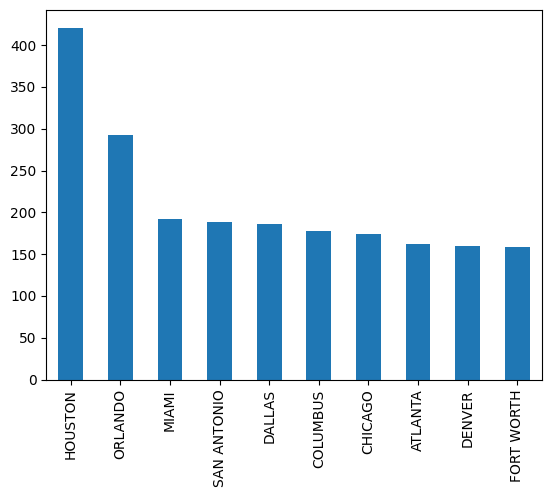

In [ ]:
accidents[accidents['NatureTitle']=='Fractures']['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', x='City')

5.Οι 7 Πολιτείες με τους περισσότερους νοσηλευομένους σε φθίνουσα σειρά.

In [ ]:
accidents.groupby('State')['Hospitalized'].count().sort_values(ascending=False)[:7]

State
TEXAS           9643
FLORIDA         5942
PENNSYLVANIA    4582
OHIO            4442
ILLINOIS        3509
GEORGIA         3167
NEW YORK        2925
Name: Hospitalized, dtype: int64

Text(0, 0.5, 'Sum')

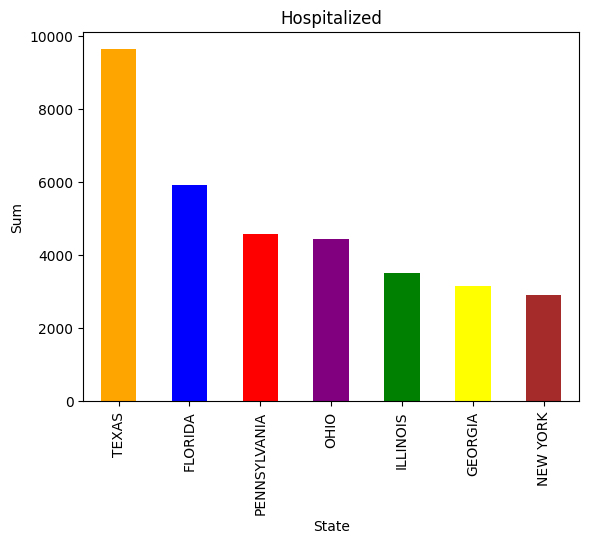

In [ ]:
accidents.groupby('State')['Hospitalized'].count().sort_values(ascending=False)[:7].plot(kind='bar', title='Hospitalized', color=('orange','blue','red','purple','green','yellow','brown'))
plt.xlabel('State')
plt.ylabel('Sum')

6.Οι 10 πιο συχνές φύσεις περιστατικών.

<Axes: >

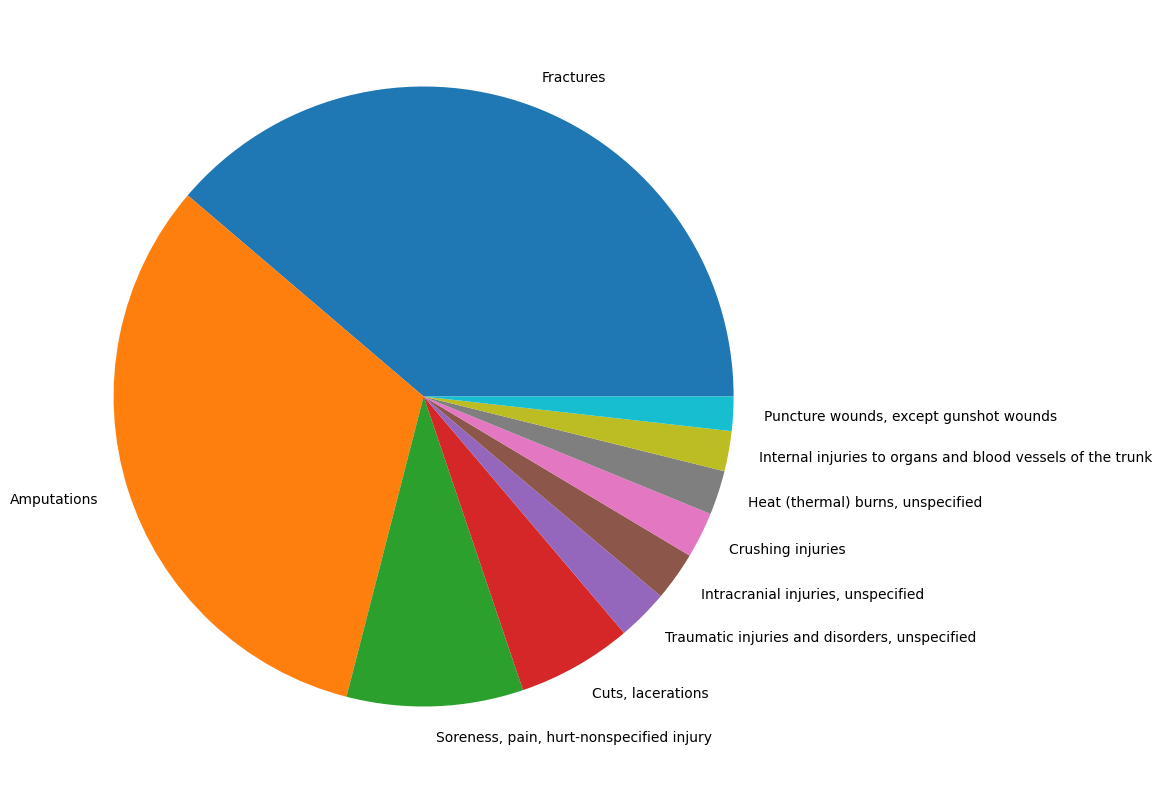

In [ ]:
accidents.value_counts('NatureTitle')[:10].plot(kind='pie',figsize=(10.,11.))

7.Οι 10 πόλεις της Πολιτείας New York με τα περισσότερα ατυχήματα.

In [ ]:
New_York=accidents[accidents['State'] == 'NEW YORK']
New_York

,EventDate,Employer,City,State,Zip,Latitude,Longitude,Hospitalized,Amputation,Final Narrative,NatureTitle,Part of Body Title,EventTitle,SourceTitle,Secondary Source Title
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,1.0,0.0,Three correctional facility guards were escort...,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,Inmate or detainee in custody
47,1/5/2015,PHELPS MEMORIAL HOSPITAL,NORTH TARRYTOWN,NEW YORK,10591.0,41.10,-73.86,1.0,0.0,Worker tripped over a box at his work station....,Fractures,"Leg(s), unspecified",Fall on same level due to tripping over an obj...,"Floor, n.e.c.","Boxes, crates, cartons"
49,1/5/2015,"NBTY, INC.",HOLBROOK,NEW YORK,11741.0,40.78,-73.08,1.0,0.0,An employee was operating an electric ride on ...,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Part of occupants body caught between vehicle...,Powered industrial carrier,"Cases, cabinets, racks, shelves, n.e.c."
53,1/5/2015,LIDESTRI FOODS,ROCHESTER,NEW YORK,14606.0,43.18,-77.68,1.0,0.0,A worker splashed caustic water on his left th...,"Chemical burns and corrosions, unspecified",Upper and lower limb(s),"Exposure through intact skin, eyes, or other e...","Sodium and potassium hydroxide, potassium carb...",NaN
63,1/5/2015,ASB Greenworld Inc.,FERNDALE,NEW YORK,12734.0,41.70,-74.77,1.0,1.0,The employee's arm was caught at the head roll...,Amputations,"Arm(s), unspecified","Caught in running equipment or machinery, unsp...","Other metal, woodworking, and special material...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57840,7/30/2020,Locust Hill Landscaping,AUBURN,NEW YORK,13021.0,42.88,-76.54,1.0,0.0,An employee was operating a skid steer. The sk...,"Avulsions, enucleations",Finger injuries,"Nonroadway noncollision incident, n.e.c.","Skid steer loaders, mini loaders",NaN
57846,7/30/2020,TARGET CORPORATION,FLUSHING,NEW YORK,11354.0,40.75,-73.83,1.0,0.0,An employee was collecting shopping carts in a...,Fractures,"Arm(s), unspecified","Fall on same level, unspecified","Parking lot, unspecified",NaN
57847,7/30/2020,"Integrated Nano-Technologies, Inc.",HENRIETTA,NEW YORK,14467.0,43.05,-77.64,1.0,0.0,An employee was unloading a piece of equipment...,Internal injuries to organs and blood vessels ...,Multiple trunk locations,Struck by object falling from vehicle or machi...,Nonclassifiable,"Truck-motorized freight hauling and utility, u..."
57853,7/31/2020,Ortronics Inc.,FARMINGDALE,NEW YORK,11735.0,40.75,-73.40,0.0,1.0,An employee was operating a brake press. The p...,Amputations,Finger injuries,Caught in running equipment or machinery durin...,Brake presses,NaN


<Axes: >

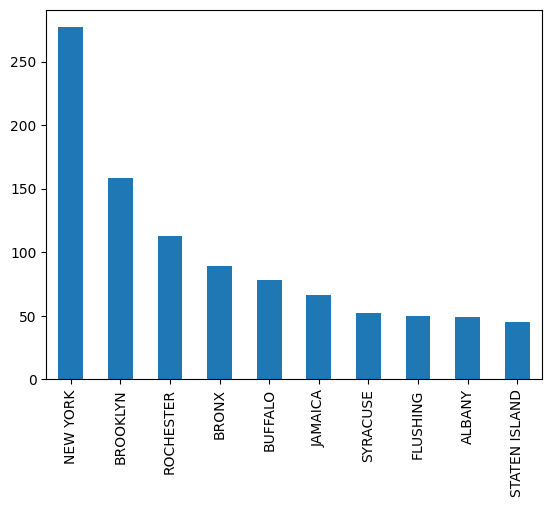

In [ ]:
New_York.City.value_counts()[:10].plot(kind='bar')

8.Οι 20 πόλεις τα περισσότερα περιστατικά φύσεως 'Fractures'.

In [ ]:
fractures=accidents[accidents['NatureTitle'] == 'Fractures']

<Axes: >

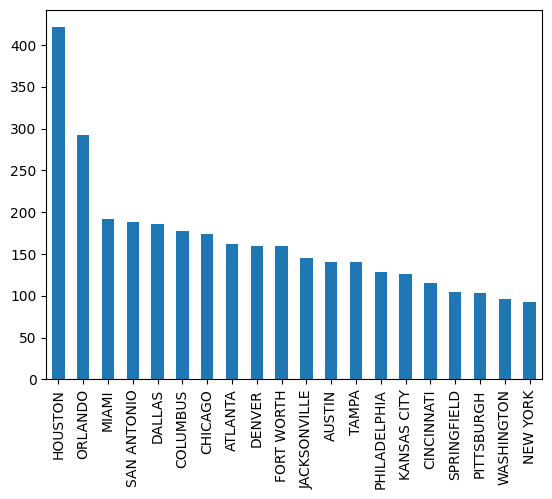

In [ ]:
fractures.City.value_counts()[:20].plot(kind='bar')

9.Οι 15 ημέρες με τα περισσότερα ατυχήματα σε φθίνουσα σειρά.

<Axes: >

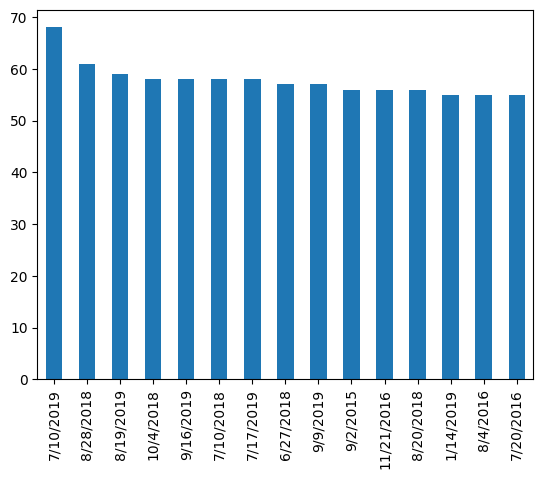

In [ ]:
accidents['EventDate'].value_counts()[:15].plot(kind='bar')

10. Τα πιο συχνά σημεία τραυματισμού του σώματος που προκλήθηκαν από κάποιον co-worker.

In [ ]:
coworker=accidents[accidents['SourceTitle'] == 'Co-worker']

<Axes: ylabel='Part of Body Title'>

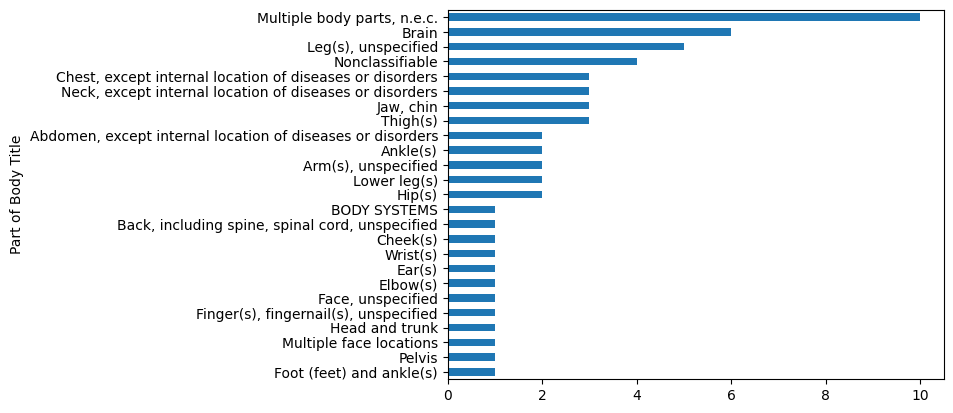

In [ ]:
coworker.groupby('Part of Body Title')['SourceTitle'].count().sort_values(ascending=True).plot(kind='barh')